## Time series forecasting for CO2 and Greenhouse Gas Emissions prediction

The CO2 and Greenhouse Gas Emissions dataset is a collection of key metrics maintained by [Our World in Data](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions).

The steps of the project are:
1) Preprocess tha data 
2) Analyze the data
3) Perform some EDA
4) Auto-Correlation Function (ACF) and Partial Auto-Correlation (PACF)
5) Perform Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras OR Using ARIMA Model


[Dataset description](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv)

# 1. Data Loading and preprocessing

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

In [153]:
#Import the data 
df = pd.read_csv('owid-co2-data.csv')

In [163]:
# Filter the data and keep only the data in the year range [1980-2020]
df_co2 = df[df.year >= 1990]

In [164]:
df_co2.describe()

,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,7516.000000,7192.000000,3945.000000,7471.000000,7176.000000,3945.000000,7080.000000,3945.000000,7192.000000,7.192000e+03,...,5155.000000,5211.000000,5157.000000,5211.000000,5157.000000,6.981000e+03,4.818000e+03,5798.000000,5789.000000,4412.000000
mean,2005.044039,458.508790,798.158474,3.540515,4.871574,-2.434606,5.145062,6.588614,1.566670,2.018877e+04,...,8.099506,82.253370,2.046923,29.308135,0.606690,8.732298e+07,5.532436e+11,1593.975525,26058.396650,1.765146
std,8.935672,2360.474897,3086.686970,50.394767,75.148270,183.160424,6.478640,6.950978,7.877685,9.941110e+04,...,9.387477,566.702756,3.534126,199.291118,0.844671,5.291105e+08,3.536217e+12,9809.010501,34261.768424,1.527343
min,1990.000000,0.004000,0.197000,-94.480000,-1895.244000,-1657.998000,0.016000,0.055000,0.000000,1.100000e-02,...,-50.487000,0.000000,0.000000,0.000000,0.000000,1.606000e+03,2.571720e+08,0.000000,0.000000,0.050000
25%,1997.000000,0.955250,10.262000,-1.990000,-0.117000,-0.949000,0.762000,1.225000,0.000000,2.566725e+01,...,2.514000,2.150000,0.715000,0.535000,0.228000,6.648730e+05,1.786550e+10,6.538250,3619.947000,0.838750
50%,2005.000000,7.886500,55.120000,1.340000,0.022000,1.997000,3.012000,4.422000,0.030000,2.485875e+02,...,5.474000,9.030000,1.111000,3.590000,0.384000,5.645629e+06,5.668752e+10,54.472500,14274.570000,1.346000
75%,2013.000000,68.416500,267.170000,6.230000,0.878500,9.907000,7.506500,9.906000,0.250000,2.708085e+03,...,10.299000,31.055000,1.690000,10.570000,0.607000,2.157607e+07,2.720693e+11,354.988500,34563.497000,2.127250
max,2020.000000,36702.503000,36702.503000,3993.520000,1736.258000,1028.487000,68.724000,57.792000,100.000000,1.696524e+06,...,86.991000,8660.010000,39.812000,3054.000000,8.239000,7.794799e+09,1.136302e+14,162194.290000,317582.498000,13.229000


## Million tonnes measurement

In [165]:
# define the column to get rid of in order to keep only the value measured in million tonnes
cols = ['iso_code','co2_per_capita','cement_co2_per_capita','coal_co2_per_capita','flaring_co2_per_capita','gas_co2_per_capita',
'oil_co2_per_capita','other_co2_per_capita','co2_per_gdp','co2_per_unit_energy','consumption_co2_per_capita',
'methane_per_capita','nitrous_oxide_per_capita','energy_per_capita',
'consumption_co2_per_gdp','population','gdp','primary_energy_consumption','energy_per_gdp']
df_co2 = df_co2.drop(cols,axis=1)

In [166]:
# Percentage of global cumulative production-based emissions of CO2 from different materials since the first year 
# of data availability
percentage = ['trade_co2_share','share_global_co2','share_global_cement_co2','share_global_coal_co2','share_global_flaring_co2','share_global_gas_co2',
'share_global_oil_co2','share_global_other_co2','share_global_cumulative_co2','share_global_cumulative_cement_co2',
'share_global_cumulative_coal_co2','share_global_cumulative_flaring_co2','share_global_cumulative_gas_co2',	
'share_global_cumulative_oil_co2','share_global_cumulative_other_co2','co2_growth_prct']

#delete them form the df_co2 dataset 
df_co2 = df_co2.drop(percentage,axis=1)

In [167]:
# Fill the NA value with the averages of columns where they are to avoid to delete them and lose information
df_co2 = df_co2.fillna(df_co2.mean())

In [218]:
'''FUNCTIONS'''

def correlation(data : pd.core.frame.DataFrame):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix) #to plot only a half matrix
    mask[np.triu_indices_from(mask)] = True #to generate a mask for the upper triangle
    sns.heatmap(corr_matrix, mask=mask, square=True,cmap="PuOr_r")
    return

def visualization(data : pd.core.frame.DataFrame, values : list):
    date_time_key = "year"
    time_data = data[date_time_key]
    fig, axes = plt.subplots(nrows=(len(values)//2), ncols=2, figsize=(15, 20), dpi=100, facecolor="w", edgecolor="k")
    c = iter(cm.Paired(np.linspace(0, 1, len(values))))

    for i in range(len(values)):
        key = [values[i]]
        #c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color = next(c),#color=c,
            rot=25,
        )
        ax.legend([values[i]])
    plt.tight_layout()
    return

### Raw data visualization for **Italy** of the cumulative production-based emissions of CO2 since the 1980 measured in million tonnes

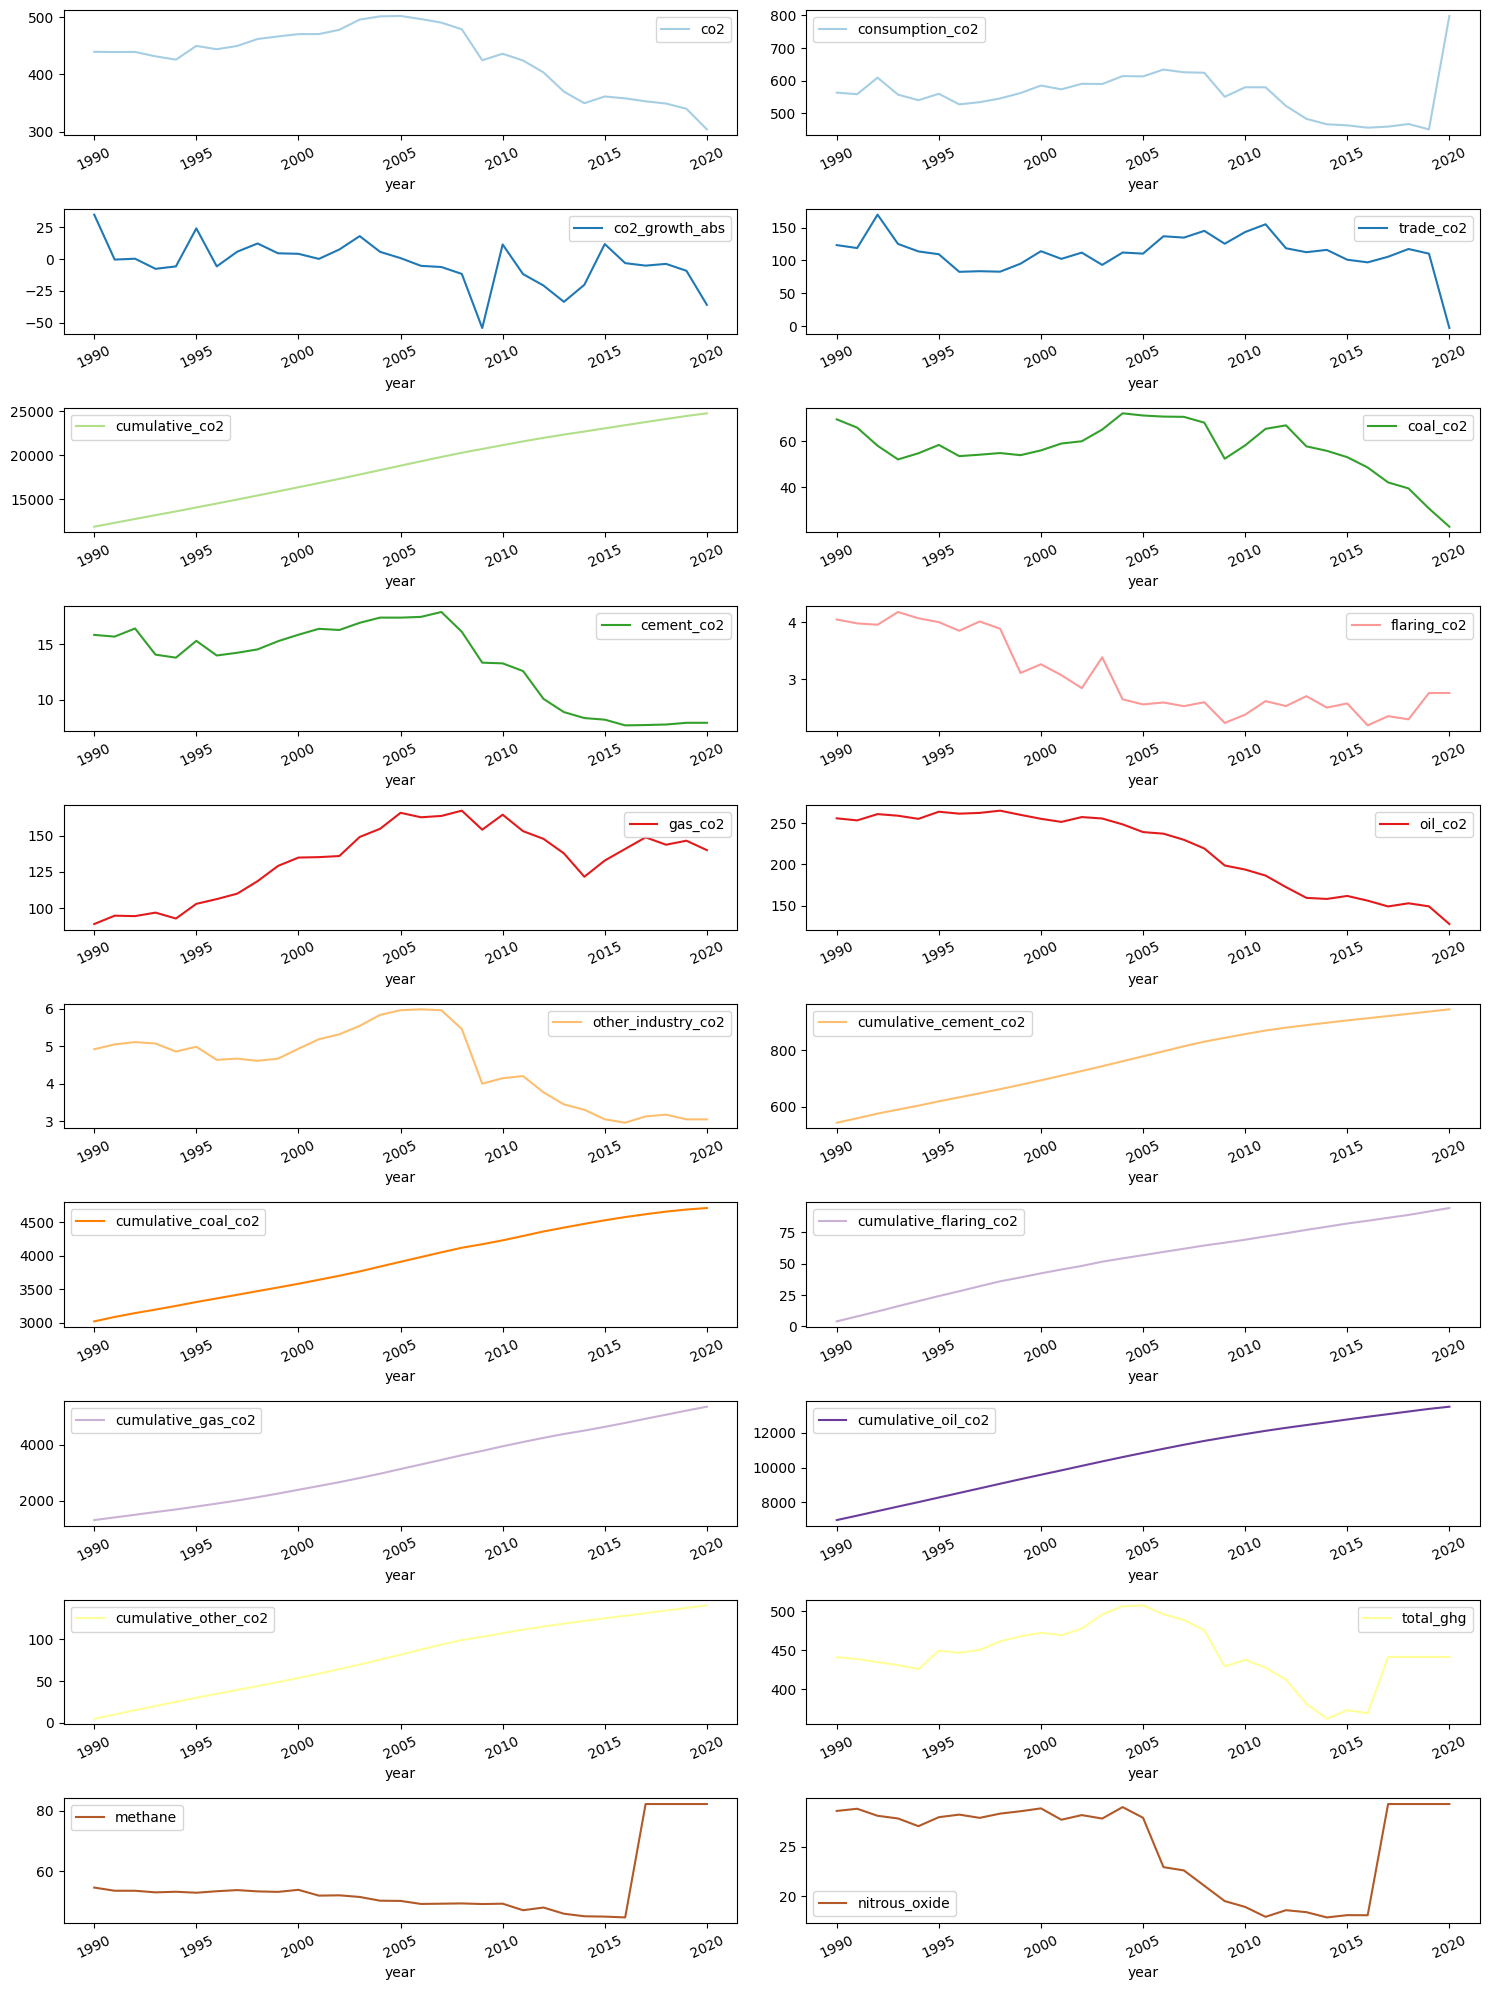

In [217]:
value = ['co2', 'consumption_co2', 'co2_growth_abs',
       'trade_co2', 'cumulative_co2', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cumulative_cement_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'total_ghg', 'methane', 'nitrous_oxide']
       
visualization(df_co2[df_co2.country == 'Italy'],value)

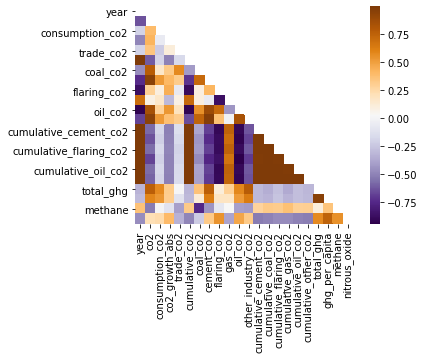

In [226]:
# Correlation
correlation(df_co2[df_co2.country=='Italy'])

In [ ]:
#AUTOCORRELATION FUNCTION ACF
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot

plot_acf(df_co2.loc[:,~df_co2.columns.isin(['country'])])
plt.show()

------------------------------------------------------------------------------------

## Shared percentage measurement

In [183]:
# create a dataset with only the shared percentage 
percentage.append('country')
percentage.append('year')
share_global_df = pd.read_csv('owid-co2-data.csv', usecols= percentage)

In [184]:
share_global_df = share_global_df[share_global_df.year > 1990]

In [185]:
# Fill the NA value with the averages of columns where they are to avoid to delete them and lose information
share_global_df = share_global_df.fillna(share_global_df.mean())

In [186]:
italy_co2 = share_global_df[share_global_df.country == 'Italy']

### Raw data visualization for **Italy** of the cumulative production-based emissions of CO2 since the 1980 measured  as a percentage

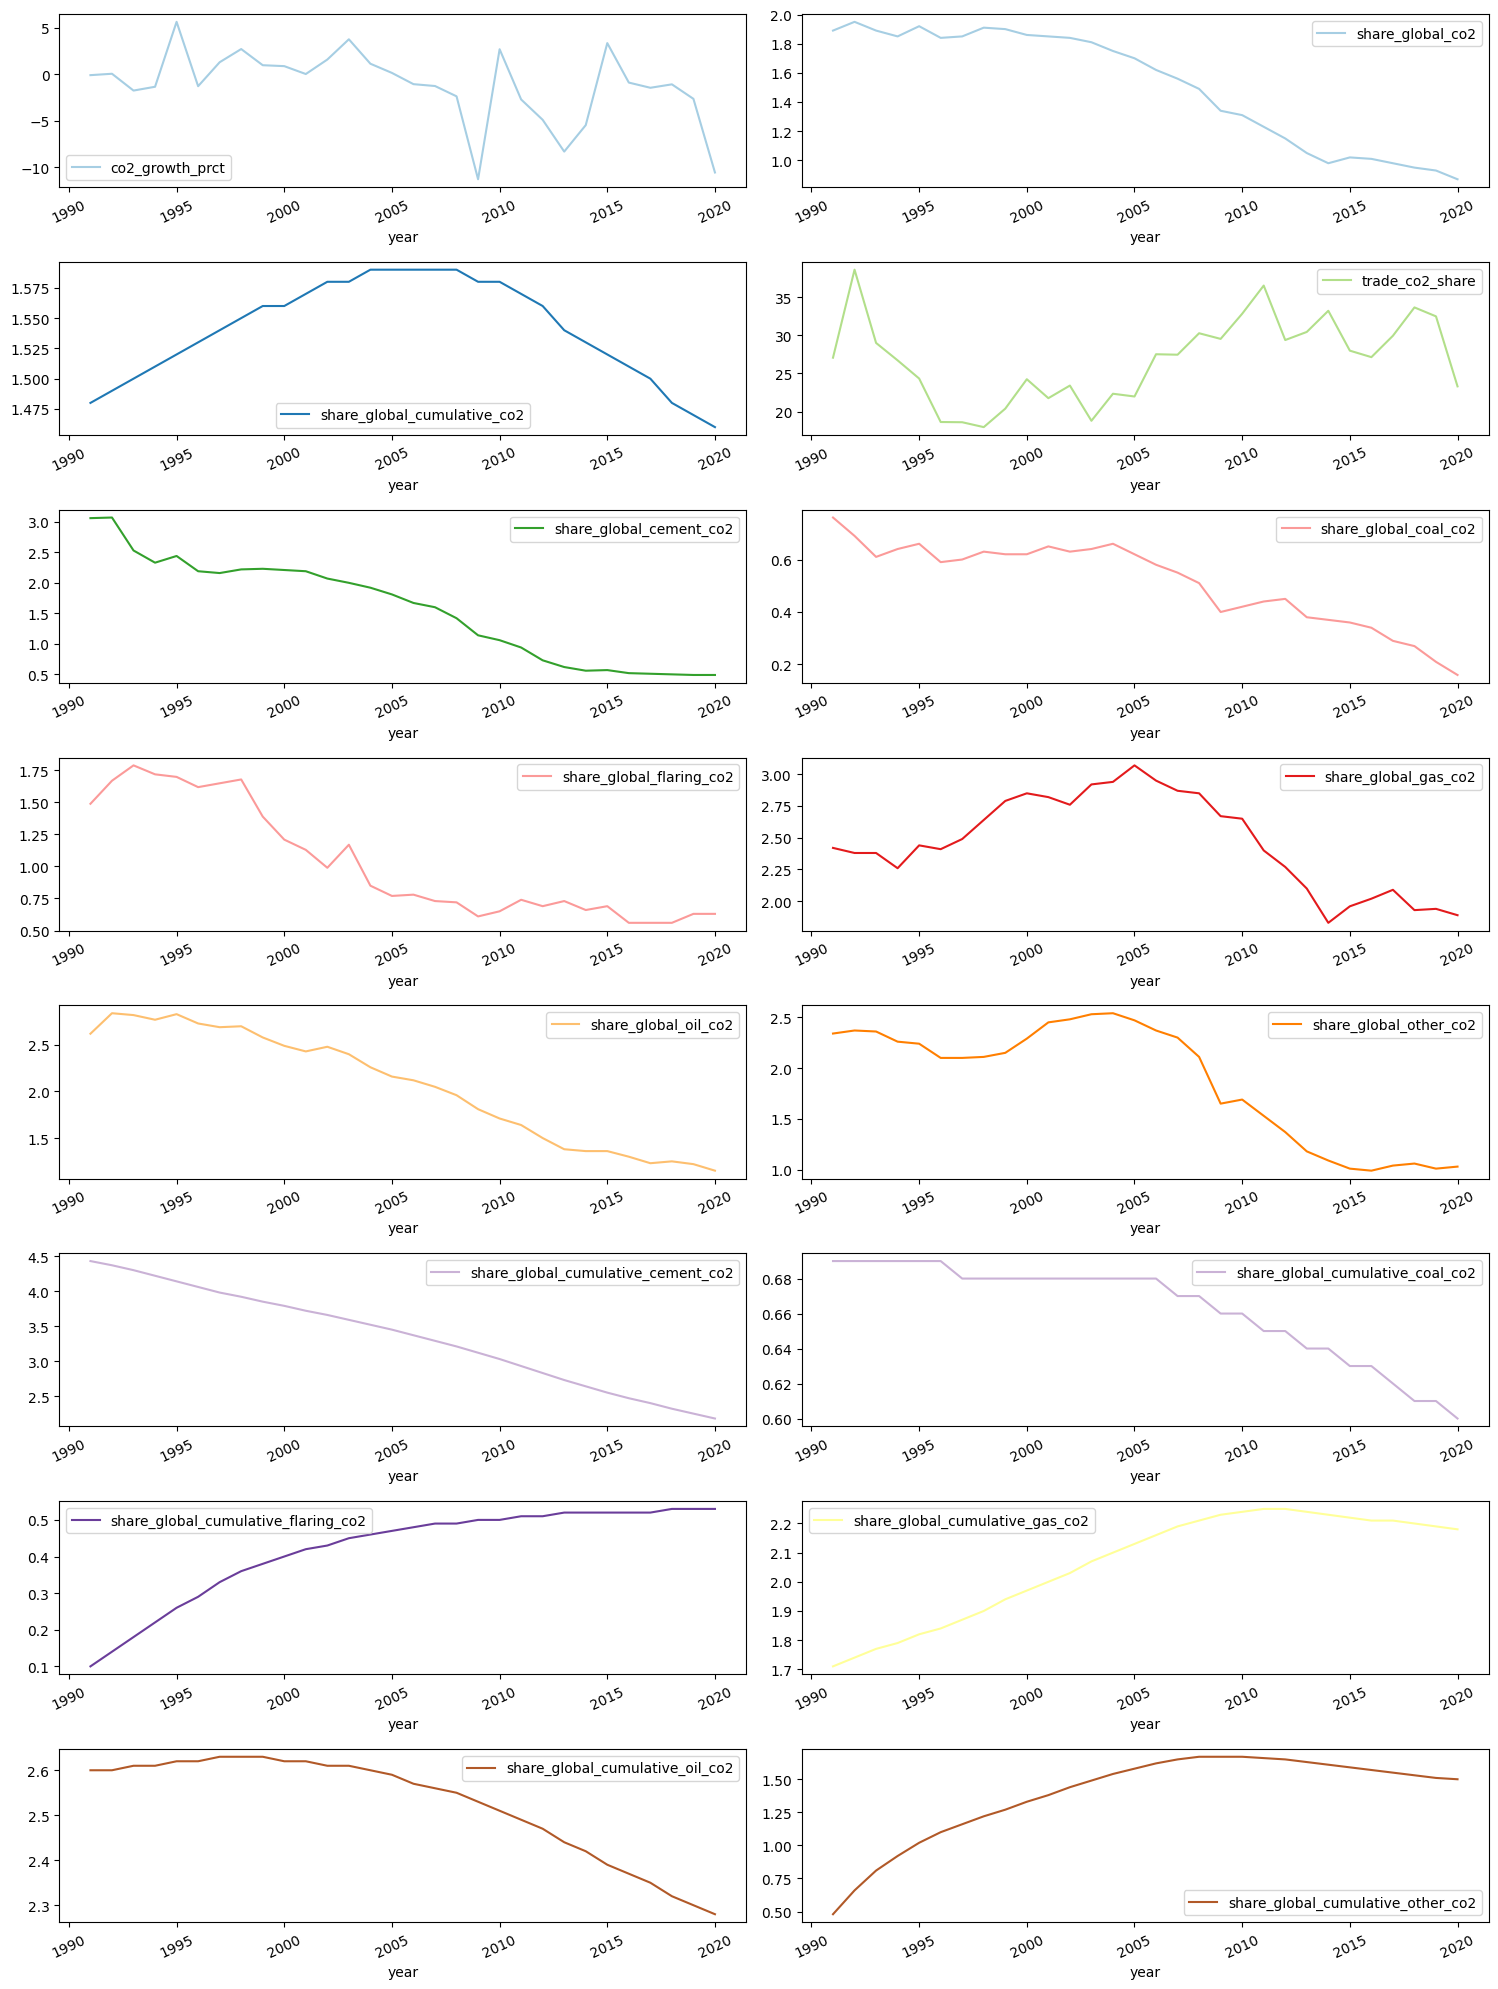

In [220]:
values = ['co2_growth_prct', 'share_global_co2',
       'share_global_cumulative_co2', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'share_global_cumulative_cement_co2',
       'share_global_cumulative_coal_co2',
       'share_global_cumulative_flaring_co2',
       'share_global_cumulative_gas_co2', 'share_global_cumulative_oil_co2',
       'share_global_cumulative_other_co2']

visualization(italy_co2,values)

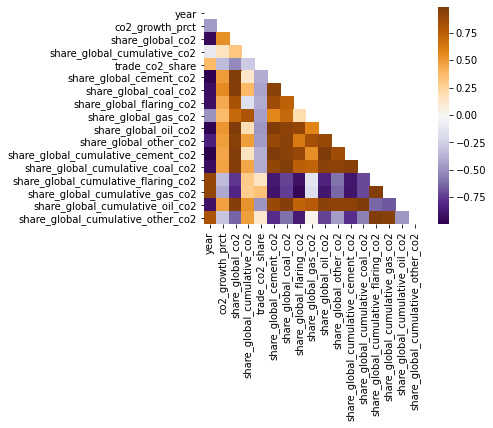

In [221]:
# Correlation
correlation(italy_co2)

LINK UTILI:
- Da studiare 
1) https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

    1a) https://machinelearningmastery.com/lstm-autoencoders/

    1b) https://machinelearningmastery.com/encoder-decoder-long-short-term-memory-networks/

    1c) https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

- Tutorials 
2) https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/

3) https://www.kaggle.com/dimitreoliveira/time-series-forecasting-with-lstm-autoencoders/notebook

4) https://www.kaggle.com/leandrovrabelo/climate-change-forecast-sarima-model
